In [1]:
import os
import numpy as np
from scipy.signal import welch
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [2]:

# Step 1: Data Preparation
data_dir = 'C:/Users/Dedu/Desktop/Research work/Neuro Marketing/Data-EEG-25-users-Neuromarketing/'  # Replace with the actual path to your data directory
users_dir = os.path.join(data_dir, '25-users')
labels_dir = os.path.join(data_dir, 'labels')

text_files = sorted([f for f in os.listdir(users_dir) if f.endswith('.txt')])
label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.lab')])

features = []
labels = []

for text_file, label_file in zip(text_files, label_files):
    text_path = os.path.join(users_dir, text_file)
    label_path = os.path.join(labels_dir, label_file)

    # Load text file and extract features
    with open(text_path, 'r') as f:
        text_data = f.read()
    # Extract features from text_data and store them in the features list
    # Apply PSD feature extraction
    freq, psd = welch(np.fromstring(text_data, dtype=float, sep='\n'), fs=1.0)
    extracted_features = psd.mean(axis=0)  # Example: Taking the mean of PSD values as features
    features.append(extracted_features)

    # Load label file and assign labels
    with open(label_path, 'r') as f:
        label_data = f.read()
    # Assign labels based on label_data and store them in the labels list
    labels.append(label_data)
    

In [3]:
# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)


In [4]:
# Reshape X to 2D array
X = X.reshape(-1, 1)

In [5]:
X

array([[61478.90540493],
       [ 1532.72805794],
       [ 1906.56126393],
       ...,
       [52854.01124456],
       [11864.17379572],
       [ 2813.00104159]])

In [6]:

# Convert the array to a DataFrame
column_names = ["features_data"]  # Replace with your actual feature names
df = pd.DataFrame(X, columns=column_names)

# Now your data is in the form of a DataFrame
print(df)


      features_data
0      61478.905405
1       1532.728058
2       1906.561264
3       1960.869490
4       1994.285424
...             ...
1040    3104.764774
1041    2804.372477
1042   52854.011245
1043   11864.173796
1044    2813.001042

[1045 rows x 1 columns]


In [7]:

# Convert the array to a DataFrame
column_names = ["features_data"]  # Replace with your actual feature names
df = pd.DataFrame(X, columns=column_names)

# Now your data is in the form of a DataFrame
print(df)


      features_data
0      61478.905405
1       1532.728058
2       1906.561264
3       1960.869490
4       1994.285424
...             ...
1040    3104.764774
1041    2804.372477
1042   52854.011245
1043   11864.173796
1044    2813.001042

[1045 rows x 1 columns]


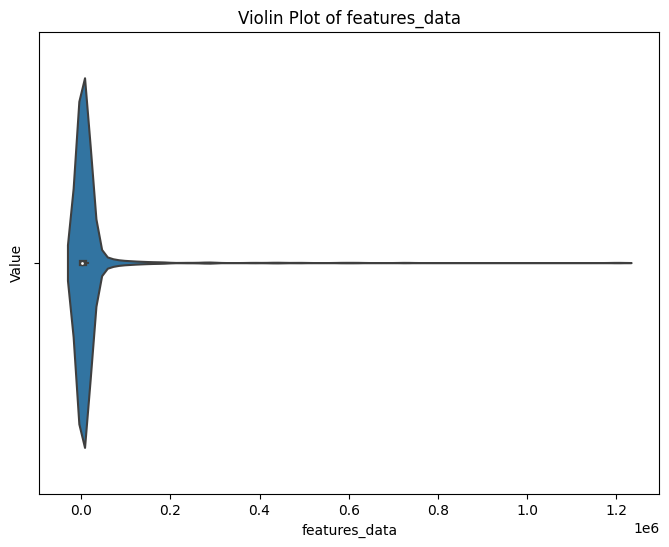

In [8]:
# Create a violin plot using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.violinplot(x=df["features_data"])

# Set plot labels and title
plt.xlabel("features_data")
plt.ylabel("Value")
plt.title("Violin Plot of features_data")

# Display the plot
plt.show()


In [9]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df[['features_data']])

C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=50)

In [10]:
df['scores']=model.decision_function(df[['features_data']])
df['anomaly']=model.predict(df[['features_data']])
df.head(20)

,features_data,scores,anomaly
0,61478.905405,-0.130007,-1
1,1532.728058,0.129360,1
2,1906.561264,0.148674,1
3,1960.869490,0.143290,1
4,1994.285424,0.142755,1
5,2189.740598,0.144714,1
6,1724.302003,0.144220,1
7,3273.205973,0.103174,1
8,3690.235521,0.102399,1
9,1894.576786,0.147100,1


In [11]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

      features_data    scores  anomaly
0      61478.905405 -0.130007       -1
16    112436.872198 -0.193766       -1
17     17544.811191 -0.000331       -1
19     24635.460906 -0.067007       -1
50     18521.290368 -0.003504       -1
...             ...       ...      ...
1025   83329.744532 -0.165559       -1
1027   42680.627320 -0.112655       -1
1028   78480.390516 -0.154592       -1
1029   63575.829494 -0.126585       -1
1042   52854.011245 -0.137010       -1

[105 rows x 3 columns]


In [12]:
# Filter anomalies from the original data
cleaned_data = df.drop(anomaly_index)

# Print the cleaned data
print(cleaned_data)

      features_data    scores  anomaly
1       1532.728058  0.129360        1
2       1906.561264  0.148674        1
3       1960.869490  0.143290        1
4       1994.285424  0.142755        1
5       2189.740598  0.144714        1
...             ...       ...      ...
1039   11934.709204  0.061544        1
1040    3104.764774  0.110368        1
1041    2804.372477  0.132718        1
1043   11864.173796  0.062739        1
1044    2813.001042  0.129051        1

[940 rows x 3 columns]


In [13]:

# Remove anomalies from the target array
cleaned_data = np.delete(X, anomaly_index)

# Print the cleaned target array
print(len(cleaned_data))

940


In [14]:
# Remove anomalies from the target array
cleaned_target = np.delete(y, anomaly_index)

# Print the cleaned target array
print(len(cleaned_target))

940


In [15]:
y=cleaned_target
X=cleaned_data

#bootstrap_indices = np.random.choice(len(X), size=9000, replace=True)


In [16]:
# Reshape X to 2D array
X = X.reshape(-1, 1)
X

array([[ 1532.72805794],
       [ 1906.56126393],
       [ 1960.86948973],
       [ 1994.28542405],
       [ 2189.74059754],
       [ 1724.30200267],
       [ 3273.2059728 ],
       [ 3690.23552141],
       [ 1894.57678632],
       [ 1471.23739723],
       [10566.75729616],
       [14358.6306091 ],
       [ 4675.41272886],
       [ 5253.82936599],
       [ 2944.87063443],
       [14912.60044721],
       [ 2229.56945772],
       [ 3221.24966793],
       [ 4060.22240066],
       [ 2038.86803952],
       [ 1589.03198445],
       [ 9231.72332053],
       [16364.46208498],
       [10620.82840934],
       [ 2901.0407417 ],
       [ 3077.65786149],
       [ 1330.31407443],
       [ 2618.07556743],
       [ 2754.3131247 ],
       [ 2340.99380477],
       [ 5003.72504897],
       [17735.40922348],
       [ 5253.56724582],
       [ 4337.48671778],
       [11752.80421988],
       [ 1542.94418582],
       [ 4127.35473794],
       [ 2210.99628097],
       [ 7414.39336388],
       [ 3772.54886367],


In [17]:
# Step 2: Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [18]:
y_resampled

array(['Disike', 'Disike', 'Like', ..., 'Like', 'Like', 'Like'],
      dtype='<U6')

In [19]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [20]:
bootstrap_indices = np.random.choice(len(X_scaled), size=2000, replace=True)
X_bootstrap = X_scaled[bootstrap_indices]
y_bootstrap = y_resampled[bootstrap_indices]

In [21]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [22]:
# Step 5: Apply PCA for dimensionality reduction
n_components = 1  # Specify the number of components for PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [23]:
# Custom RBF Layer
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, centers, widths, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.centers = centers
        self.widths = widths

    def call(self, inputs):
        distance = tf.norm(inputs[:, tf.newaxis] - self.centers, axis=2)
        return tf.exp(-tf.square(distance) / (2 * tf.square(self.widths)))

In [24]:
# deep descion tree classifier

# Create decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create multi-layer perceptron (neural network) classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Combine classifiers in a voting ensemble (deep neural decision forest)
voting_classifier = VotingClassifier(estimators=[('tree', decision_tree), ('mlp', mlp)], voting='soft')

In [25]:
def classification(X_train_pca, y_train, base_models):
    tf.config.experimental_run_functions_eagerly(True)
    cascade_models = []
    cascade_train_data = X_train_pca
    cascade_train_labels = y_train
    print(cascade_train_labels)
    num_centers = 10
    centers = np.random.uniform(np.min(cascade_train_data), np.max(cascade_train_data), size=(num_centers, cascade_train_data.shape[1])).astype(np.float32)
    widths = np.ones(num_centers, dtype=np.float32) * 0.5  # Adjust as needed
    if "rbf_model" in base_models:
        # RBF Model with Custom Layer
        input_layer = tf.keras.layers.Input(shape=(cascade_train_data.shape[1],))
        rbf_output = RBFLayer(centers, widths)(input_layer)
        output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(rbf_output)

        rbf_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
        rbf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        base_models[base_models.index('rbf_model')]=rbf_model

    for model in base_models:
        model.fit(cascade_train_data, cascade_train_labels)
        cascade_models.append(model)
        print(str(model)+ "training done ")
        cascade_train_pred = model.predict(cascade_train_data)
        print(str(model)+ "prediction done for training data")
        misclassified_indices = np.where(cascade_train_pred != cascade_train_labels)[0]
        misclassified_indices = misclassified_indices % len(X_train)

        cascade_train_data = np.concatenate([cascade_train_data, X_train_pca[misclassified_indices]])
        cascade_train_labels = np.concatenate([cascade_train_labels, y_train[misclassified_indices]])
    return cascade_models


In [26]:
def cascade_predict(X,cascade_models):
    predictions = []
    for model in cascade_models:
        pr=model.predict(X)
        threshold = 0.5
        pr  = [1 if prob >= threshold else 0 for prob in pr]
        predictions.append(pr)
        print(str(model)+"prediction done testing data")
        print(predictions)
        
    predictions = np.asarray(predictions)

    # Convert predictions to integers
    label_encoder = LabelEncoder()
    encoded_predictions = label_encoder.fit_transform(predictions.flatten())

    # Reshape the predictions array
    encoded_predictions_reshaped = np.reshape(encoded_predictions, (predictions.shape[0], predictions.shape[1]))

    # Perform majority voting
    majority_votes = mode(encoded_predictions_reshaped, axis=0).mode.flatten()

    return majority_votes


In [27]:
accuracies=[]
f1_scores=[]
hmodel=[]

### GradientBoostingClassifier

In [28]:
base_models = [
    GradientBoostingClassifier(n_estimators=100, max_depth=3),
]

cascade_models=classification(X_train_pca, y_train, base_models)
# Evaluate the performance of your cascade model on test data
y_pred = cascade_predict(X_test_pca,cascade_models)
print("predicted res of hybrid model", y_pred)
# Convert predicted labels to binary class labels
threshold = 0.5
#y_pred_model= np.where(y_pred >= threshold, 'Like', 'Dislike')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1_scores.append(f1)
accuracies.append(accuracy)
hmodel.append("Hybrid Model 1")

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
[0 0 1 ... 1 1 0]
GradientBoostingClassifier()training done 
GradientBoostingClassifier()prediction done for training data
GradientBoostingClassifier()prediction done testing data
[[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

C:\Users\Dedu\AppData\Local\Temp\ipykernel_19944\2161935616.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_votes = mode(encoded_predictions_reshaped, axis=0).mode.flatten()


### GradientBoostingClassifier + SVC + DecisionTreeClassifier

In [29]:
base_models = [
    GradientBoostingClassifier(n_estimators=100, max_depth=3),
    SVC(),
    DecisionTreeClassifier(),
]

cascade_models=classification(X_train_pca, y_train, base_models)
# Evaluate the performance of your cascade model on test data
y_pred = cascade_predict(X_test_pca,cascade_models)
print("predicted res of hybrid model", y_pred)
# Convert predicted labels to binary class labels
threshold = 0.5
#y_pred_model= np.where(y_pred >= threshold, 'Like', 'Dislike')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1_scores.append(f1)
accuracies.append(accuracy)
hmodel.append("Hybrid Model 2")

[0 0 1 ... 1 1 0]
GradientBoostingClassifier()training done 
GradientBoostingClassifier()prediction done for training data
SVC()training done 
SVC()prediction done for training data
DecisionTreeClassifier()training done 
DecisionTreeClassifier()prediction done for training data
GradientBoostingClassifier()prediction done testing data
[[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

C:\Users\Dedu\AppData\Local\Temp\ipykernel_19944\2161935616.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_votes = mode(encoded_predictions_reshaped, axis=0).mode.flatten()


### GradientBoostingClassifier + SVC + DecisionTreeClassifier + Radial basis function neural network

In [30]:
base_models = [
    GradientBoostingClassifier(n_estimators=100, max_depth=3),
    SVC(),
    DecisionTreeClassifier(),
    "rbf_model"
]

cascade_models=classification(X_train_pca, y_train, base_models)
# Evaluate the performance of your cascade model on test data
y_pred = cascade_predict(X_test_pca,cascade_models)
print("predicted res of hybrid model", y_pred)
# Convert predicted labels to binary class labels
threshold = 0.5
#y_pred_model= np.where(y_pred >= threshold, 'Like', 'Dislike')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1_scores.append(f1)
accuracies.append(accuracy)
hmodel.append("Hybrid Model 3")



[0 0 1 ... 1 1 0]
GradientBoostingClassifier()training done 
GradientBoostingClassifier()prediction done for training data
SVC()training done 
SVC()prediction done for training data
DecisionTreeClassifier()training done 
DecisionTreeClassifier()prediction done for training data
 7/92 [=>............................] - ETA: 0s - loss: 0.6769 - accuracy: 0.5848

C:\Users\Dedu\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


92/92 [==============================] - 1s 7ms/step - loss: 0.6779 - accuracy: 0.5935
<keras.engine.functional.Functional object at 0x000001B0E371F550>training done 
92/92 [==============================] - 0s 2ms/step
<keras.engine.functional.Functional object at 0x000001B0E371F550>prediction done for training data
GradientBoostingClassifier()prediction done testing data
[[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0

C:\Users\Dedu\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
C:\Users\Dedu\AppData\Local\Temp\ipykernel_19944\2161935616.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_votes = mode(encoded_predictions_reshaped, axis=0).mode.flatten()


### GradientBoostingClassifier + SVC + DecisionTreeClassifier + Radial basis function neural network + Deep Neural Decision Forests

In [31]:
base_models = [
    GradientBoostingClassifier(n_estimators=100, max_depth=3),
    SVC(),
    DecisionTreeClassifier(),
    "rbf_model",
    voting_classifier
]

cascade_models=classification(X_train_pca, y_train, base_models)
# Evaluate the performance of your cascade model on test data
y_pred = cascade_predict(X_test_pca,cascade_models)
print("predicted res of hybrid model", y_pred)
# Convert predicted labels to binary class labels
threshold = 0.5
#y_pred_model= np.where(y_pred >= threshold, 'Like', 'Dislike')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1_scores.append(f1)
accuracies.append(accuracy)
hmodel.append("Hybrid Model 4")

[0 0 1 ... 1 1 0]
GradientBoostingClassifier()training done 
GradientBoostingClassifier()prediction done for training data
SVC()training done 
SVC()prediction done for training data
DecisionTreeClassifier()training done 
DecisionTreeClassifier()prediction done for training data
15/92 [===>..........................] - ETA: 0s - loss: 0.6857 - accuracy: 0.5792

C:\Users\Dedu\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


92/92 [==============================] - 1s 7ms/step - loss: 0.6909 - accuracy: 0.5832
<keras.engine.functional.Functional object at 0x000001B0F2C7F0D0>training done 
92/92 [==============================] - 0s 2ms/step
<keras.engine.functional.Functional object at 0x000001B0F2C7F0D0>prediction done for training data
VotingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=42)),
                             ('mlp',
                              MLPClassifier(max_iter=1000, random_state=42))],
                 voting='soft')training done 
VotingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=42)),
                             ('mlp',
                              MLPClassifier(max_iter=1000, random_state=42))],
                 voting='soft')prediction done for training data
GradientBoostingClassifier()prediction done testing data
[[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

C:\Users\Dedu\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 [==============================] - 0s 2ms/step
<keras.engine.functional.Functional object at 0x000001B0F2C7F0D0>prediction done testing data
[[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

C:\Users\Dedu\AppData\Local\Temp\ipykernel_19944\2161935616.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_votes = mode(encoded_predictions_reshaped, axis=0).mode.flatten()


In [33]:
# Print the F1 scores and accuracies for each model
for i, model in enumerate(hmodel):
    print(f"Hybrid Model {i+1} - F1 Score: {f1_scores[i]}, Accuracy: {accuracies[i]}")


Hybrid Model 1 - F1 Score: 0.6942653552790042, Accuracy: 0.695
Hybrid Model 2 - F1 Score: 0.8016761363636362, Accuracy: 0.805
Hybrid Model 3 - F1 Score: 0.7773591237057498, Accuracy: 0.7825
Hybrid Model 4 - F1 Score: 0.8848705440900563, Accuracy: 0.885


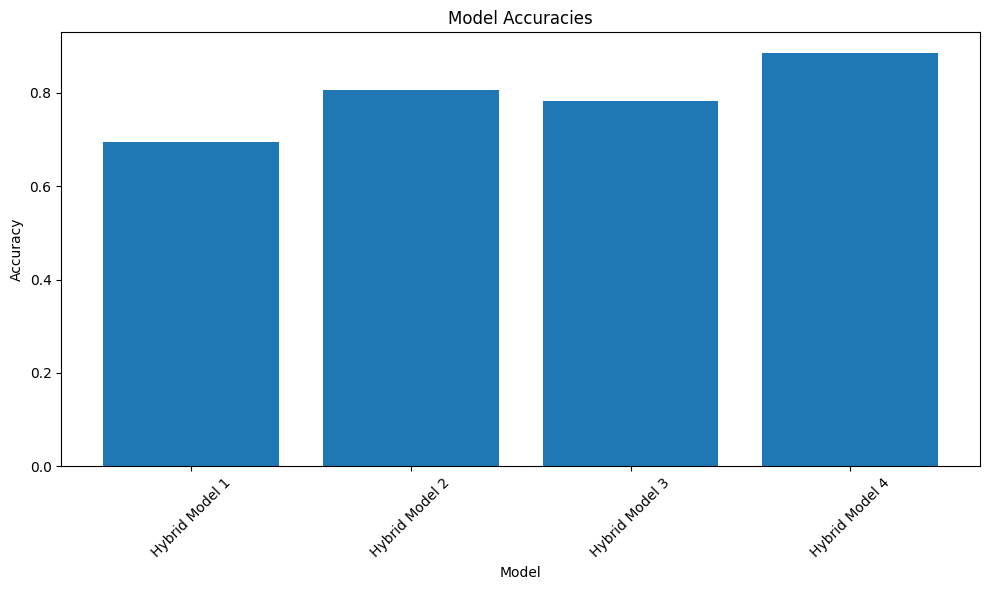

In [34]:
import matplotlib.pyplot as plt


# Plot the Accuracies for each model
plt.figure(figsize=(10, 6))
plt.bar(hmodel, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()


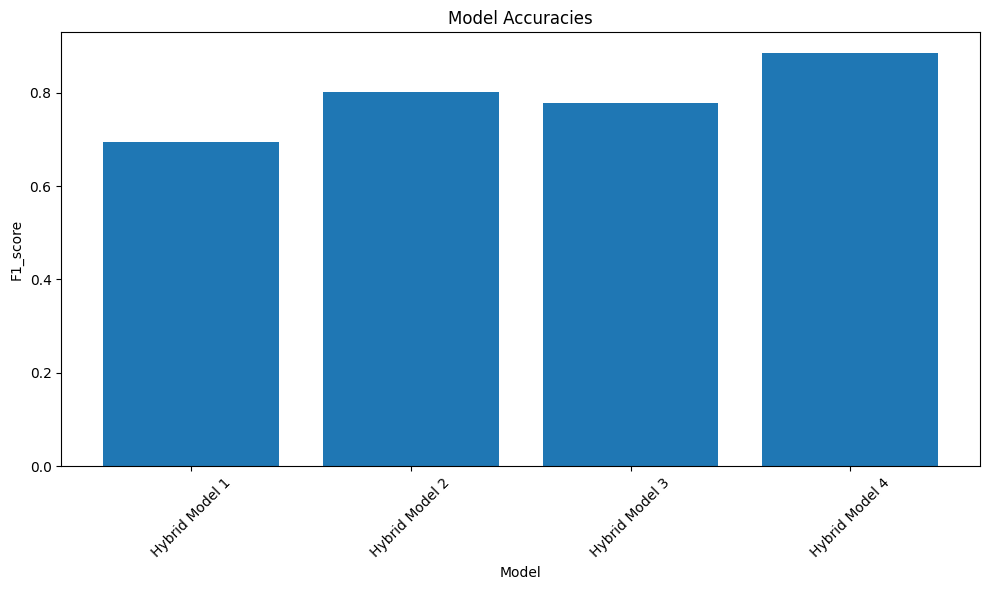

In [35]:
import matplotlib.pyplot as plt

# Plot the Accuracies for each model
plt.figure(figsize=(10, 6))
plt.bar(hmodel, f1_scores)
plt.xlabel('Model')
plt.ylabel('F1_score')
plt.title('Model Accuracies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()